<a href="https://colab.research.google.com/github/aslam7861/Machine_Learning_Project/blob/main/unsupervised_machine_learning_spotify_5000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer


from sklearn.metrics import pairwise_distances

from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
#a data to 5000 songs
data_set_5000=pd.read_csv('https://raw.githubusercontent.com/aslam7861/Machine_Learning_Project/main/df_audio_features_5000')

In [4]:
#cleaning the data with space in columns name
col= data_set_5000.columns
data_set_5000.columns=[a.split()[0] for a in col]



In [5]:
datas=data_set_5000

In [6]:
data_set_5000.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [7]:
data_set_5000=data_set_5000[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [8]:
from math import pi

In [9]:
# peng_cl_norm = MinMaxScaler().fit_transform(dd)#(data_set_5000)

In [10]:
# data_set_5000=pd.DataFrame(data_set_5000)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

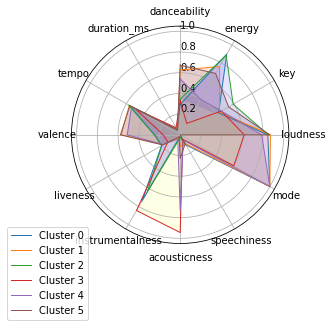

In [11]:
peng_cl_norm = MinMaxScaler().fit_transform(data_set_5000)
# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=6)
kmeans.fit(peng_cl_norm)

kmeans.cluster_centers_

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo']
#cl_pos.columns = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cl_pos
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'yellow', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'black', alpha=0.1)
# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind7
#values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
#ax.fill(angles, values, 'cyan', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [12]:
def scalers_inertias(max_n_clusters, scalers, df):
  scalers_inertias = []
  for scaler in scalers:
    inertias = []
    for i in range(1, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      inertias.append(kmeans.inertia_)
    scalers_inertias.append(inertias)
  return scalers_inertias

In [13]:
scalers=[StandardScaler(), MinMaxScaler(),  RobustScaler(),QuantileTransformer()]
inertias=scalers_inertias(10, scalers,data_set_5000)

In [34]:
from IPython.core.pylabtools import figsize
def elbow_method_inertias(max_n_clusters, inertias, scalers):
    plt.subplots(figsize=(6,6))
    for i in range(len(scalers)):
       # plt.subplots(figsize=(6,6))
        plt.plot(range(1, max_n_clusters), inertias[i],marker='o')
        #plt.plot(x=range(1,max_n_clusters), y=inertia)
    plt.title("elbow_method_visualization")
    plt.xlabel("n_clusters")
    plt.ylabel("inertia")
    plt.legend(str(scalers[i]).strip('()'))
    
    labels = []
    for scaler in scalers:
        labels.append(str(scaler).strip('()'))
    plt.legend(labels)
    plt.show()


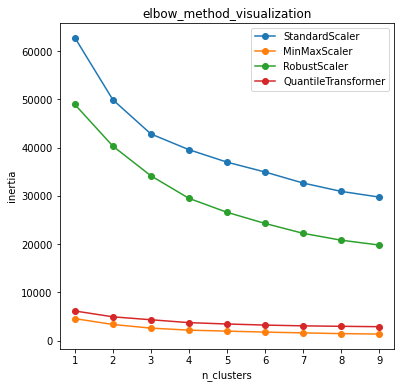

In [35]:
elbow_method_inertias(10,inertias, scalers)

In [36]:
#rescaling the two scalrs of above
scalers_scaled=[]
scalers_scaled.append(inertias[0])
scalers_scaled.append([i*10 for i in inertias[1] ])
scalers_scaled.append(inertias[2])
scalers_scaled.append([i*10 for i in inertias[3] ])

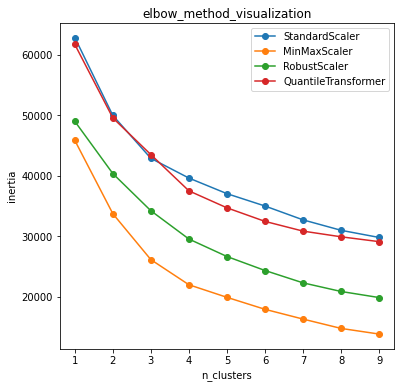

In [37]:
elbow_method_inertias(10,scalers_scaled, scalers)

In [41]:
datas.set_index(datas.columns[:2].tolist(), inplace=True)

In [42]:
datas

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
name,artist,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,0,0.302741
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,3,0.368402
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,0,0.319113
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,2,0.354310
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,2,0.284685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,2,0.183962
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,2,0.200267
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,2,0.342250


In [175]:
#This returns number of songs in each cluster together with totals songs
# and data frame of  updated dataset and cetroids
def selective_songs(max_n_cluster, df, features, num_songs, distance):
    # ciel_nums =num_songs#  int(np.ceil(num_songs/max_n_cluster))
    #df=df[features]
    df_f=df[features]
    df_norm=MinMaxScaler().fit_transform(df_f)
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(df_norm)
    cl_pos= pd.DataFrame(kmeans.cluster_centers_)
    cl_pos.columns=df_f.columns
    df_f['cluster']=kmeans.labels_
    df['cluster']=kmeans.labels_
    cl_pos['cluster']= cl_pos.index
    dists=[]
    for i in range(df_f.shape[0]):
        cent = int(df_f.iloc[i]['cluster'])
        if distance == 'euclidean':
            dists.append(np.sqrt(  sum([a**2 for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))
        else:
            dists.append(  sum([abs(a) for a in (df_f.iloc[i]-cl_pos.iloc[cent])] ))

    df_f['euc_dist']=dists
    df['euc_dist']=dists
    # songs=[]
    # for i in range(max_n_cluster):
    #     df_cluster=df.sort_values('euc_dist').groupby('cluster')
    #     songs.append(df_cluster[df_cluster['cluster']==i].head(num_songs) )
    songs=df.sort_values('euc_dist').groupby('cluster').head(num_songs)
    dfs = []
    for i in range(max_n_cluster):
        dfs.append(songs[songs['cluster']==i])
    #songs = select_df[:num_songs]
    return dfs, songs,df,cl_pos

In [176]:
dfs, songs,dff, cl_pos=selective_songs(4,datas,['danceability', 'acousticness', 'energy'], 30, 'euclidean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [44]:
dff=dff.sort_values('euc_dist')

In [45]:
n_cluster=6
each=[dff[dff['cluster']==i].head(4) for i in range(n_cluster)]


In [46]:
each[0]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
name,artist,,,,,,,,,,,,,,,,,,
Camarera de Mi Amor,Antonio Machín,0.631,0.557,3,-8.932,1,0.0287,0.554,0.000004,0.0806,0.964,140.648,,101813,4,3k2KNKdvXceiVlT3P6WgVh,https://open.spotify.com/track/3k2KNKdvXceiVlT...,0,0.029916
Mariana,Seu Jorge,0.617,0.526,9,-10.638,0,0.0376,0.538,0.389000,0.1050,0.931,167.706,,275853,4,2BkIiZYOniMrWBBlADyVNX,https://open.spotify.com/track/2BkIiZYOniMrWBB...,0,0.034851
Bromes,Les Sueques,0.641,0.501,1,-9.333,1,0.0226,0.589,0.062500,0.3350,0.935,92.188,,156430,4,5E2ivmmWqJINn0716sYc4c,https://open.spotify.com/track/5E2ivmmWqJINn07...,0,0.038564
Hard to Handle,Otis Redding,0.666,0.550,10,-8.672,1,0.0612,0.573,0.000002,0.1220,0.961,95.552,,141000,4,7FXuCkl1kfxwS5icDjTwbM,https://open.spotify.com/track/7FXuCkl1kfxwS5i...,0,0.042052


In [20]:
#0 cluster songs
#dfs[0]

In [47]:
# alternative to find a number of songs with each cluster
#for cluster 1
dff[dff['cluster']==1].sort_values('euc_dist').head(5)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
name,artist,,,,,,,,,,,,,,,,,,
Nothing Changes Anything,Desecrator,0.294,0.897,0,-9.765,1,0.1020,0.015900,0.902,0.444,0.2870,172.909,,436335,4,6xlSTmt5piHn3gpEctPHBU,https://open.spotify.com/track/6xlSTmt5piHn3gp...,1,0.006858
Inhuman Condition,Massacre,0.298,0.907,6,-8.950,0,0.1010,0.000943,0.461,0.315,0.2340,104.771,,340427,3,77UhhjiHJ5dOczb3mYB3EY,https://open.spotify.com/track/77UhhjiHJ5dOczb...,1,0.013392
Dying Remains,Morta Skuld,0.292,0.906,2,-8.751,1,0.0408,0.000463,0.509,0.357,0.3230,133.260,,313840,4,06oKheJWvcpFuHTRqTC0Ar,https://open.spotify.com/track/06oKheJWvcpFuHT...,1,0.013541
Cult of the Initiated,Pessimist,0.293,0.909,11,-11.266,0,0.0700,0.000007,0.918,0.220,0.1180,96.045,,329169,4,4T51bkkddn5Q63D5l4grq3,https://open.spotify.com/track/4T51bkkddn5Q63D...,1,0.014686
Chaos Fury,Vomitory,0.302,0.908,10,-6.904,0,0.0759,0.000007,0.894,0.299,0.0785,119.130,,189800,5,2nHkf2fVMG9aKH1Doq39sH,https://open.spotify.com/track/2nHkf2fVMG9aKH1...,1,0.015911


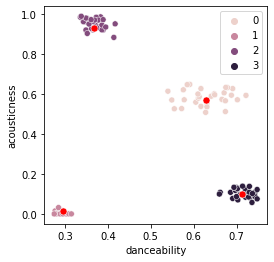

In [22]:
fig, ax=plt.subplots(figsize=(4,4))
sns.scatterplot(data=songs, x='danceability', y='acousticness', hue='cluster')
sns.scatterplot(data=cl_pos, x='danceability', y='acousticness',color='red', s=50)


Text(0.5, 0, 'energy')

<Figure size 432x288 with 0 Axes>

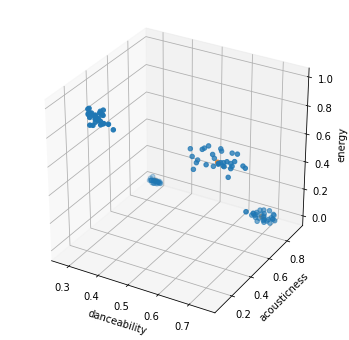

In [23]:
#in 3d picture with certain features
fig = plt.figure()
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.8)
# ax.set_zlim(0, 0.8)

d=songs
ax.scatter(d['danceability'],d['energy'], d['acousticness'])
ax.scatter(cl_pos['danceability'], cl_pos['energy'], cl_pos['acousticness'])

ax.set_xlabel('danceability')
ax.set_ylabel('acousticness')
ax.set_zlabel('energy')

In [49]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', \
            'time_signature']

In [52]:
audio_features_df=datas[features]

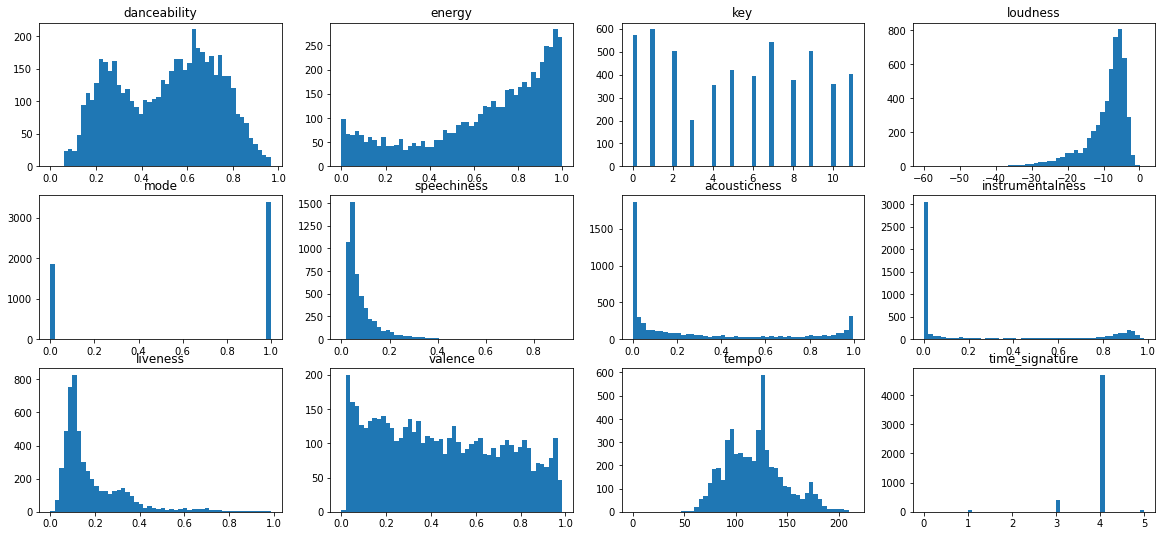

In [57]:
plt.figure(figsize=(20, 9))
#zip() is an iterator of tuples
for feature, i in zip(audio_features_df.columns, range(len(audio_features_df.columns))):
  plt.subplot(3,4,i+1)

  plt.hist(audio_features_df[feature], bins=50)
  plt.title(f'{feature}')
  # plt.show()



In [58]:
audio_features_df.corr().style.background_gradient(axis=None, cmap="OrRd")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
danceability,1.000000,0.040491,0.002152,0.358328,-0.088908,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585,0.215498
energy,0.040491,1.000000,0.029702,0.786860,-0.008461,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617,0.162435
key,0.002152,0.029702,1.000000,0.027082,-0.155697,0.027547,-0.024794,-0.016775,0.025193,-0.018109,-0.002370,0.007796
loudness,0.358328,0.786860,0.027082,1.000000,-0.030855,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228,0.215875
mode,-0.088908,-0.008461,-0.155697,-0.030855,1.000000,-0.041282,0.028854,-0.003017,-0.009712,0.005966,0.004739,-0.013039
speechiness,0.036121,0.303940,0.027547,0.233609,-0.041282,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255,0.060871
acousticness,-0.111151,-0.850469,-0.024794,-0.697709,0.028854,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994,-0.163980
instrumentalness,-0.573800,-0.169923,-0.016775,-0.471786,-0.003017,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945,-0.160122
liveness,-0.032534,0.170642,0.025193,0.134788,-0.009712,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370,0.025039
valence,0.680097,0.159101,-0.018109,0.335754,0.005966,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783,0.189048


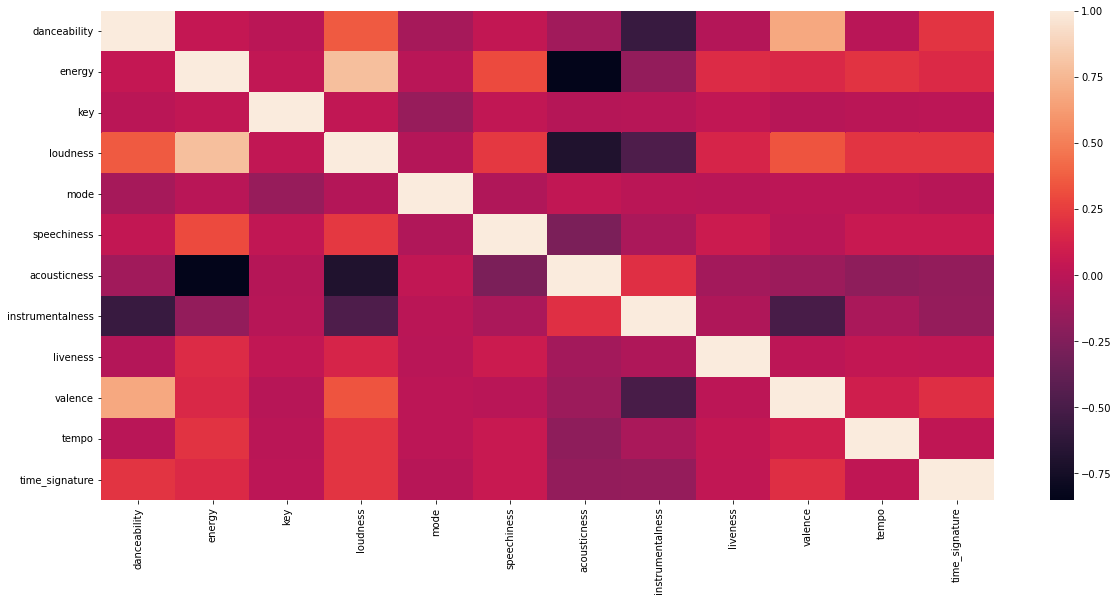

In [59]:
plt.subplots(figsize=(20, 9))
sns.heatmap(audio_features_df.corr())

In [60]:
scalers

[StandardScaler(), MinMaxScaler(), RobustScaler(), QuantileTransformer()]

In [62]:
def scalers_silhouettes_scores(max_n_clusters, scalers, df):
  silhouettes_scores = []
  for scaler in scalers:
    scores = []
    for i in range(2, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      scores.append(silhouette_score(X, y_kmeans))
    silhouettes_scores.append(scores)
  return silhouettes_scores

**find the number Kmeans using silhouettes method
**

In [65]:
scalers_silhouettes_scores_data = scalers_silhouettes_scores(10, scalers, audio_features_df)

In [69]:
def silhouettes_scores_plots(max_n_clusters, scalers_silhouettes_scores_data, scalers):
  plt.subplots(figsize=(12, 8))
  for silhouette_scores_data in scalers_silhouettes_scores_data:  
    plt.plot(range(2, max_n_clusters), silhouette_scores_data, marker='o')

  plt.title('The Silhouettes Scores')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Scores')
  plt.axvline(x = 6, color = 'b', label = 'axvline - full height')
  labels = []
  for scaler in scalers:
    labels.append(str(scaler).strip('()'))
  plt.legend(labels)
  plt.show()

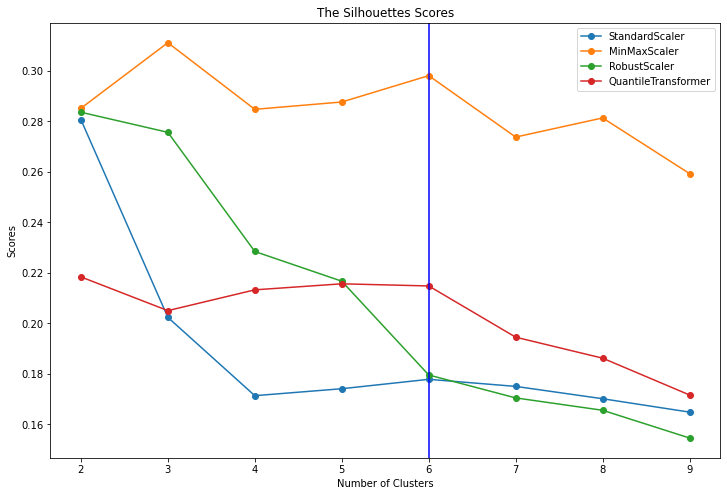

In [70]:
silhouettes_scores_plots(10, scalers_silhouettes_scores_data, scalers)

In [71]:
scores_sums = []
for i in range(len(scalers_silhouettes_scores_data)):
  scores_sums.append(sum(scalers_silhouettes_scores_data[i]))

scores_sums

[1.5164376585109074, 2.2810895554849266, 1.674598621843518, 1.6195492586680609]

In [72]:
sc = scalers[scores_sums.index(max(scores_sums))]
sc

MinMaxScaler()

For n_clusters = 5 The average silhouette_score is : 0.28763451893250797
For n_clusters = 6 The average silhouette_score is : 0.29807788287621545
For n_clusters = 7 The average silhouette_score is : 0.27375753377201506
For n_clusters = 8 The average silhouette_score is : 0.28133654474391295
For n_clusters = 9 The average silhouette_score is : 0.2592811747706922
For n_clusters = 10 The average silhouette_score is : 0.25314805532706386


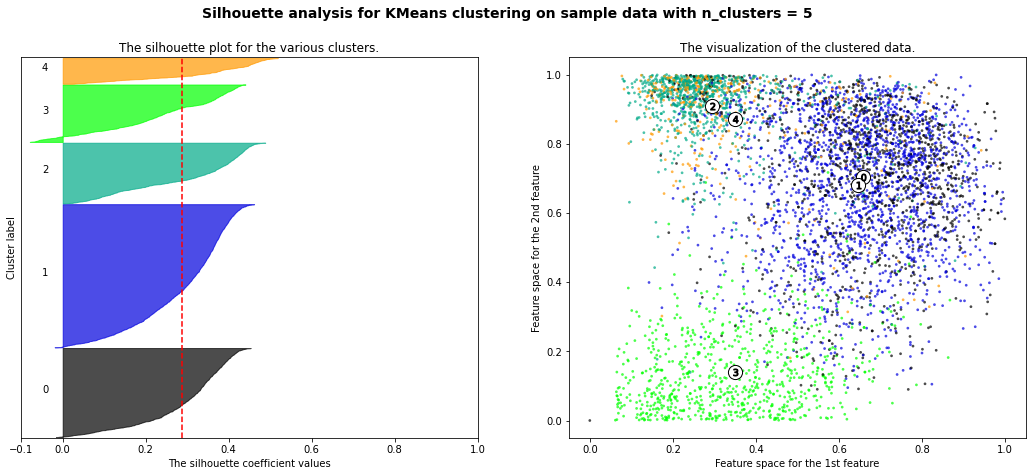

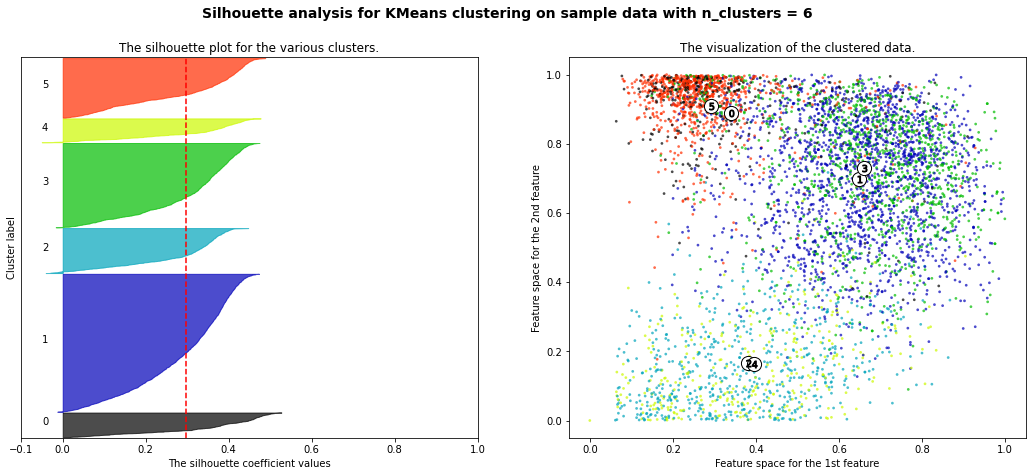

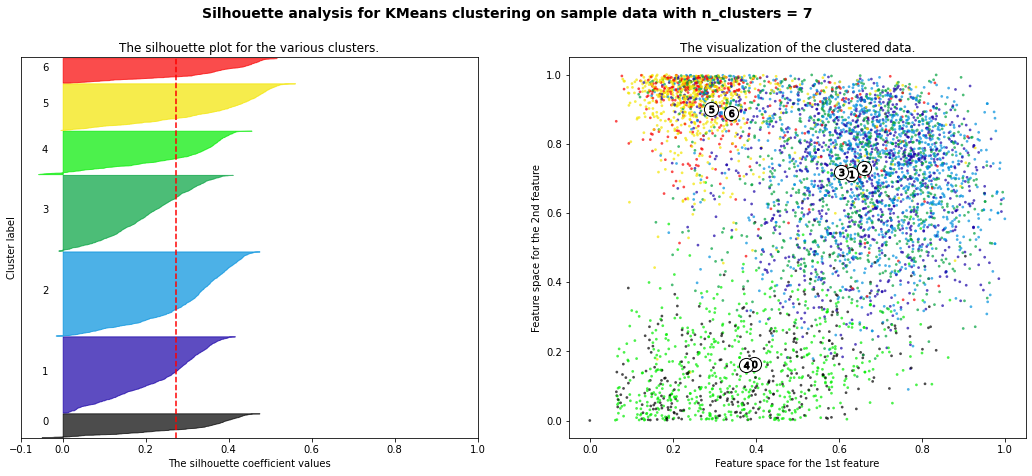

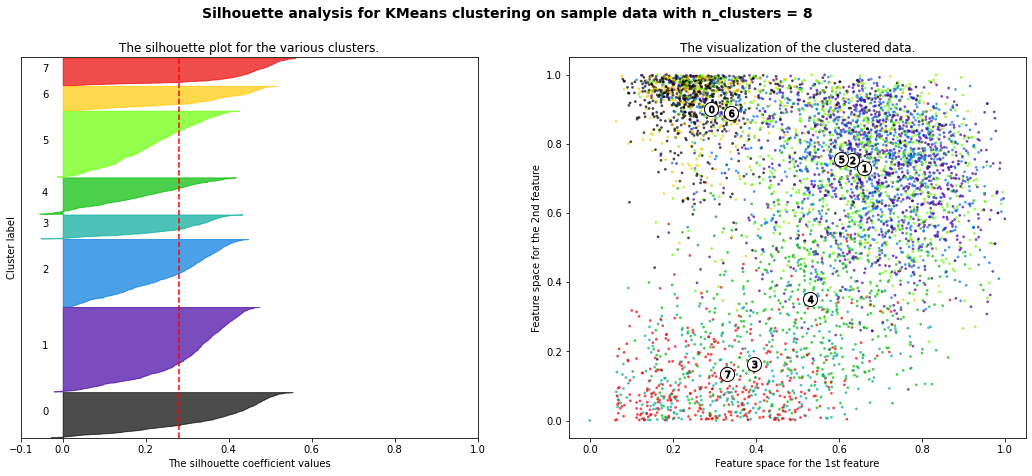

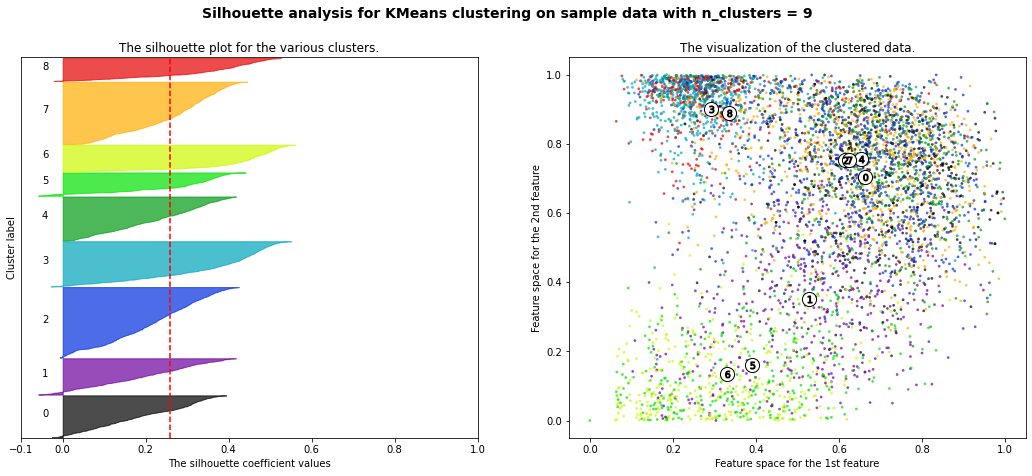

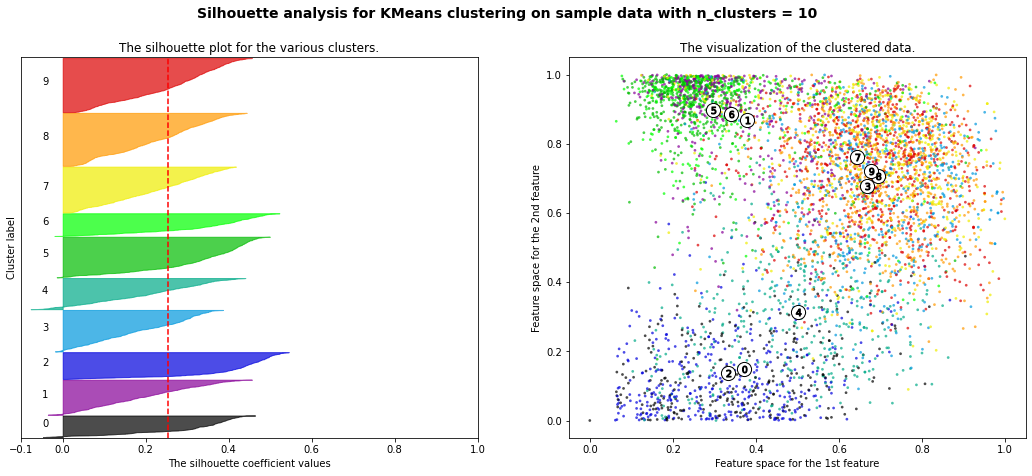

In [75]:
import matplotlib.cm as cm


silhouette_avgs = []
range_n_clusters = [5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    sc = sc
    X = sc.fit_transform(audio_features_df)
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    # sc = MinMaxScaler()
    # X = sc.fit_transform(audio_features_df)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [89]:
n_clusters=6

In [90]:
audio_features_df.drop('cluster',axis=1, inplace=True)

In [91]:
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', random_state=0)
X = sc.fit_transform(audio_features_df)
y_kmeans = kmeans.fit_predict(X)
audio_features_df['cluster'] = y_kmeans + 1
audio_features_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4,2
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4,3
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4,3


In [92]:
audio_features_df.groupby(by='cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
1,0.328950,0.888810,6.335277,-7.942778,0.0,0.100789,0.020163,0.727373,0.197409,0.258413,123.023921,3.860058
2,0.628129,0.698669,4.817568,-7.026343,1.0,0.080438,0.221719,0.019438,0.187162,0.608145,121.031228,3.978690
3,0.369293,0.167239,4.931529,-19.183575,1.0,0.045588,0.909818,0.535299,0.151826,0.227421,108.410314,3.692675
4,0.639559,0.729309,6.021259,-6.329924,0.0,0.094832,0.174182,0.018719,0.196687,0.555215,121.213168,3.967687
5,0.381884,0.162097,5.612613,-19.938991,0.0,0.045971,0.899994,0.624278,0.143818,0.227704,104.472502,3.759760
6,0.282422,0.909313,4.835138,-7.835052,1.0,0.109079,0.010795,0.594710,0.202132,0.230978,121.573495,3.870036


In [97]:
audio_features_df.groupby(by='cluster').count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
1,343,343,343,343,343,343,343,343,343,343,343,343
2,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924
3,628,628,628,628,628,628,628,628,628,628,628,628
4,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176
5,333,333,333,333,333,333,333,333,333,333,333,333
6,831,831,831,831,831,831,831,831,831,831,831,831


In [98]:
def clusters_feature_distributions_plot(n_clusters, feature, df):
  for i in range(1, n_clusters + 1):
    df[df['cluster'] == i][feature].hist(bins=50, alpha=0.8)
    labels = []
    for j in range(1, n_clusters + 1):
      labels.append(f'cluster {j}')
    plt.legend(labels)
    plt.title(f'Distribution of {feature} for each Cluster')



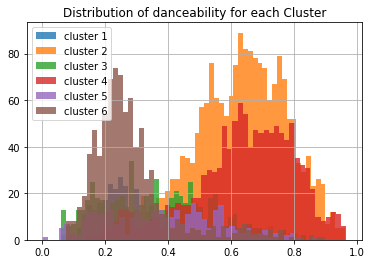

In [99]:
clusters_feature_distributions_plot(6, 'danceability', audio_features_df)

In [104]:
cl_pos

,danceability,acousticness,energy,cluster
0,0.627973,0.570488,0.532222,0
1,0.294844,0.013433,0.903343,1
2,0.367629,0.929286,0.147426,2
3,0.711742,0.099161,0.746667,3


In [109]:
len(audio_features_df.columns)

13

In [117]:
cl_pos= pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns=audio_features_df.columns[:12]
cl_pos['cluster']= cl_pos.index+1

In [118]:
cl_pos

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,0.340176,0.888810,0.575934,0.848639,-2.220446e-16,0.109792,0.020244,0.738450,0.200009,0.262348,0.574905,0.772012,1
1,0.649565,0.698669,0.437961,0.863579,1.000000e+00,0.087623,0.222609,0.019734,0.189627,0.617406,0.565593,0.795738,2
2,0.381896,0.167239,0.448321,0.665391,1.000000e+00,0.049660,0.913472,0.543450,0.153826,0.230885,0.506614,0.738535,3
3,0.661384,0.729309,0.547387,0.874932,5.662137e-15,0.103303,0.174882,0.019004,0.199278,0.563670,0.566443,0.793537,4
4,0.394916,0.162097,0.510238,0.653076,7.771561e-16,0.050078,0.903608,0.633785,0.145712,0.231172,0.488212,0.751952,5
5,0.292060,0.909313,0.439558,0.850395,1.000000e+00,0.118823,0.010839,0.603767,0.204795,0.234495,0.568127,0.774007,6


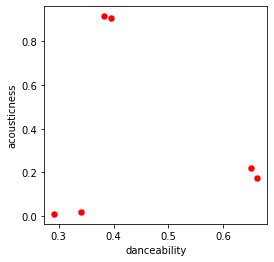

In [114]:
fig, ax=plt.subplots(figsize=(4,4))
#sns.scatterplot(data=audio_features_df, x='danceability', y='energy', hue='cluster')
sns.scatterplot(data=cl_pos, x='danceability', y='acousticness',color='red', s=50)


This shows we need to work more on choosing with cluster 3 or explore more


Text(0.5, 0, 'energy')

<Figure size 432x288 with 0 Axes>

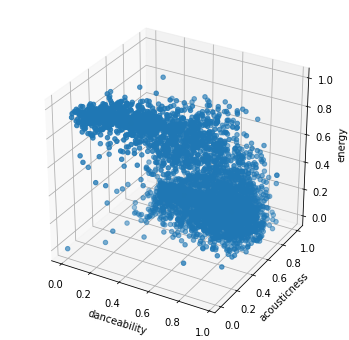

In [100]:
# fig = plt.figure()
# fig = plt.figure(figsize=(6, 6))
# ax = plt.axes(projection='3d')
# # ax.set_xlim(0, 0.8)
# # ax.set_ylim(0, 0.8)
# # ax.set_zlim(0, 0.8)

# d=audio_features_df
# ax.scatter(d['danceability'],d['energy'], d['acousticness'])
# ax.scatter(cl_pos['danceability'], cl_pos['energy'], cl_pos['acousticness'])

# ax.set_xlabel('danceability')
# ax.set_ylabel('acousticness')
# ax.set_zlabel('energy')

##Distance

In [115]:
from scipy.spatial import distance

In [153]:
audio_features_df['cluster'].max()

6

In [152]:
# cl_pos['cluster'].min()

1

In [119]:
cluster_n_df_list = []
for i in range(n_clusters): 
  globals()[f'cluster_{i+1}_df'] = audio_features_df[audio_features_df['cluster'] == i + 1]
  cluster_n_df_list.append(globals()[f'cluster_{i+1}_df'])

In [122]:
def cluster_eucl_dists(cluster_n_df, clusters_centroids_df):
  dists = []
  for i in range(len(cluster_n_df)):
    dist = distance.euclidean(clusters_centroids_df.loc[cluster_n_df['cluster'].unique()[0]-1,:], cluster_n_df.iloc[i,:])
    dists.append(dist)
  return dists

In [123]:
def cluster_manh_dists(cluster_n_df, clusters_centroids_df):
  dists = []
  for i in range(len(cluster_n_df)):
    dist = distance.cityblock(clusters_centroids_df.loc[cluster_n_df['cluster'].unique()[0]-1,:], cluster_n_df.iloc[i,:])
    dists.append(dist)
  return dists

In [127]:
len(audio_features_df.columns)==len(cl_pos.columns)

True

In [130]:
all(audio_features_df.columns==cl_pos.columns) == True

True

In [132]:
ddd= audio_features_df

In [144]:
i=1
cent = int(audio_features_df.iloc[i]['cluster'])
np.sqrt(  sum([a**2 for a in (audio_features_df.iloc[i]-cl_pos.iloc[cent])] ))
#sum([abs(a) for a in (audio_features_df.iloc[i]-cl_pos.iloc[cent])] )

125.30256560417305

In [145]:
distance.euclidean(audio_features_df.iloc[i],cl_pos.iloc[cent])

125.30256560417305

In [142]:
distance.cityblock(audio_features_df.iloc[i],cl_pos.iloc[cent])

146.0127090500316

In [163]:
audio_features_df=ddd[ddd.columns[:-2]]

In [164]:
euc_dists=[]
man_dists=[]
for i in range(audio_features_df.shape[0]):
        cent = int(audio_features_df.iloc[i]['cluster'])-1
        #cluster has been added by 1
        #if distance == 'euclidean':
        # euc_dists.append(np.sqrt(  sum([a**2 for a in (audio_features_df.iloc[i]-cl_pos.iloc[cent])] )))
        euc_dists.append(distance.euclidean(audio_features_df.iloc[i],cl_pos.iloc[cent]))
        # else:
        man_dists.append(distance.cityblock(audio_features_df.iloc[i],cl_pos.iloc[cent]))
audio_features_df['euc_dist']=euc_dists
audio_features_df['man_dist']=man_dists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [165]:
audio_features_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,euc_dist,man_dist
name,artist,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4,4,111.244253,139.562516
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4,2,125.255575,143.377977
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4,2,93.960032,110.905714
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4,3,108.051924,133.434795
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4,3,122.333234,150.815500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4,3,90.744512,117.959104
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4,3,85.888456,114.700249
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3,3,83.857753,126.734974


# Creating and adding playlists in spotify to find a number of best songs close to each centroids

In [166]:
final_df=audio_features_df.copy()

In [168]:
#pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 7.2 MB/s 
     |████████████████████████████████| 246 kB 36.8 MB/s 
     |████████████████████████████████| 62 kB 657 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [169]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [170]:
def create_playlist(token, spotifyObject):

    playlist_name = input('Enter a playlist name:')
    playlist_description = input('Enter a playlist description:')

    return spotifyObject.user_playlist_create(user=username, name=playlist_name, public=True, description=playlist_description)



In [171]:
def add_tracks(cluster_n, n_tracks):
    # user_input = input('Enter the song:')
    list_of_songs = final_df[final_df['cluster'] == cluster_n].sort_values('eucl_dist').head(n_tracks)['html'].tolist()

    prePlaylist = spotifyObject.user_playlists(user=username)
    playlist = prePlaylist['items'][0]['id']

    return spotifyObject.user_playlist_add_tracks(user=username, playlist_id=playlist, tracks=list_of_songs)

In [172]:
# import api keys
from keys import *

ModuleNotFoundError: ignored

In [ ]:
# username = ''
# scope = 'playlist-modify-public'
# client_id = ''
# client_secret = ''
# redirect_uri = ''

In [ ]:
token = SpotifyOAuth(scope=scope, username=username, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
spotifyObject = spotipy.Spotify(auth_manager=token)

In [173]:
create_playlist(token, spotifyObject)
add_tracks(1,20)

NameError: ignored

In [174]:
for i in range(2, n_clusters+1):
    create_playlist(token, spotifyObject)
    add_tracks(i,20)

NameError: ignored